# Visualise correlation between features

## Set up

In [123]:
## import necesarry libraries
import dython
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wordcloud

from collections import Counter
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import train_test_split

In [124]:
## read in data
instances = pd.read_csv('data/ships_extended.csv', index_col=0)

In [125]:
## distinguish features
cat_nom = ['ship', 'number', 'case', 'scansion']
cat_ord = ['book', 'position']
num_dis = ['num_lines', 'difference']
num_con = ['line', 'ratio']

In [126]:
## split data for feature engineering
X_train, X_test, y_train, t_test = train_test_split(instances.drop(['epithet_gr', 'epithet_en'], axis=1), instances['epithet_en'], test_size=0.2, random_state=20016)

In [127]:
## count occurences of the label
en_dict = Counter(y_train)

# Visualisations

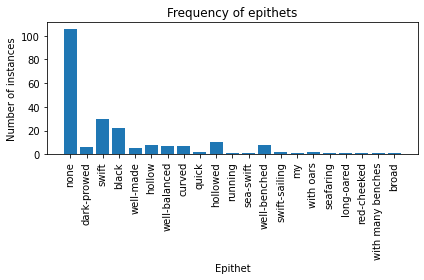

In [128]:
## plot frequency of each epithet
plt.bar(en_dict.keys(), en_dict.values())
plt.title('Frequency of epithets')
plt.ylabel('Number of instances')
plt.xlabel('Epithet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('plots/epithet_distribution.jpg')
plt.show()

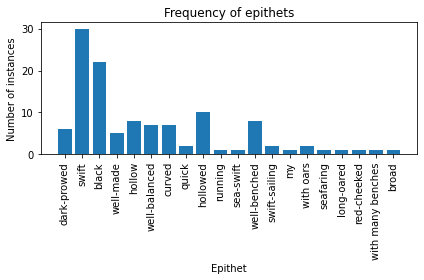

In [129]:
## distribution of epithets excluding instances with no epithet
y_list = y_train.to_list()
adj = [epithet for epithet in y_list if epithet != 'none']
en_dict = Counter(adj)

## plot frequency of each epithet
plt.bar(en_dict.keys(), en_dict.values())
plt.title('Frequency of epithets')
plt.ylabel('Number of instances')
plt.xlabel('Epithet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('plots/epithet_distribution_filtered.jpg')
plt.show()

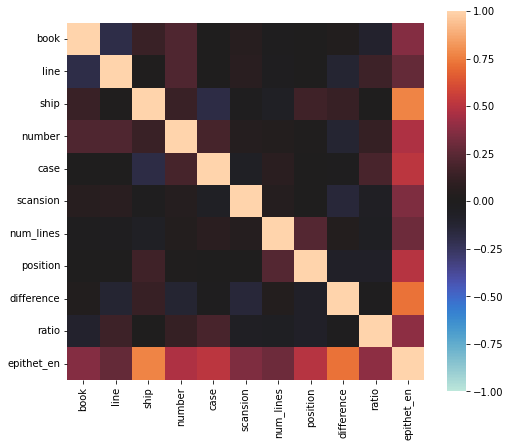

In [130]:
## correlation between all features
attributes = X_train
attributes['epithet_en'] = y_train
corr_all = dython.nominal.associations(attributes.drop(['clause', 'trigrams'], axis=1), annot=False, filename='plots/correlation_all.jpg', figsize=(8,7))

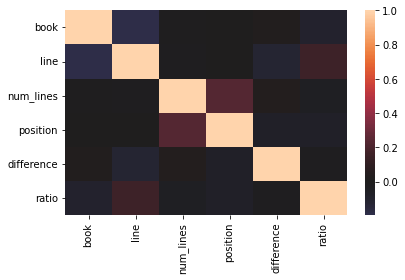

In [131]:
## correlation between numerical features (inc categorical ordinal)
continuous = X_train.drop(cat_nom, axis=1)
corr_cont = continuous.corr(method='pearson')
sns.heatmap(corr_cont, cmap=sns.color_palette("icefire", as_cmap=True), center=0)
plt.tight_layout()
plt.savefig('plots/numerical_correlations.jpg')

In [132]:
## rank the correlation of each variable with the label
sorted_mat = corr_all['corr'].unstack().sort_values()

## reformat series into data frame
df = pd.DataFrame(data=sorted_mat)
df.rename({0:'correlation'}, axis=1, inplace=True)
df['Index'] = df.index
df = pd.concat(
        [df.drop('Index', axis=1), 
        df['Index'].apply(pd.Series)]
    , axis=1)

## output correlation list
correlations = pd.DataFrame(df[df[0] == 'epithet_en']['correlation'])
correlations = correlations.sort_values(by='correlation', ascending=False)

## remove multi-level indexing
correlations.index = correlations.index.droplevel(0)

correlations = correlations.drop('epithet_en')
correlations

,correlation
ship,0.768332
difference,0.721310
case,0.512921
position,0.498597
number,0.470722
ratio,0.388908
book,0.364417
scansion,0.347935
num_lines,0.299060
line,0.280061


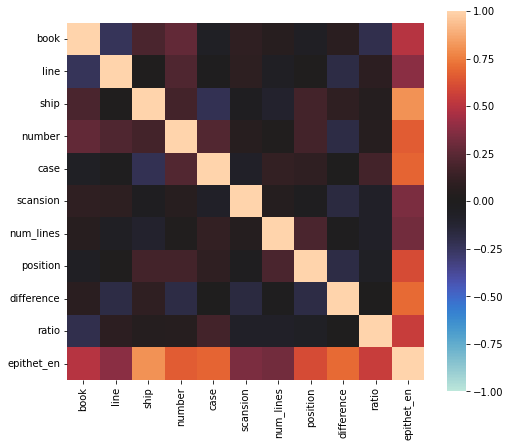

In [133]:
## correlation without NaN
adj = attributes[attributes['epithet_en']!='none']
corr_all = dython.nominal.associations(adj.drop(['clause', 'trigrams'], axis=1), annot=False, filename='plots/correlation_filtered.jpg', figsize=(8,7))

In [134]:
## rank the correlation of each variable with the label
sorted_mat = corr_all['corr'].unstack().sort_values()

## reformat series into data frame
df = pd.DataFrame(data=sorted_mat)
df.rename({0:'correlation'}, axis=1, inplace=True)
df['Index'] = df.index
df = pd.concat(
        [df.drop('Index', axis=1), 
        df['Index'].apply(pd.Series)]
    , axis=1)

## output correlation list
correlations = pd.DataFrame(df[df[0] == 'epithet_en']['correlation'])
correlations = correlations.sort_values(by='correlation', ascending=False)

## remove multi-level indexing
correlations.index = correlations.index.droplevel(0)

correlations = correlations.drop('epithet_en')
correlations

,correlation
ship,0.811280
difference,0.701552
case,0.684421
number,0.657348
position,0.605148
ratio,0.548615
book,0.497864
line,0.378666
scansion,0.342720
num_lines,0.317354


## Word visualisation

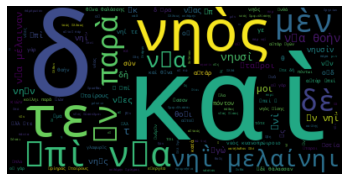

In [135]:
X_train_clause = X_train['clause'].to_list()
words = []
for i in range(len(X_train_clause)):
    words.append(X_train_clause[i].replace(' | ', ' '))
stringclause = ' '.join(words)
wc = wordcloud.WordCloud().generate(stringclause)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('plots/wordcloud.jpg')

In [136]:
## preprocess clause
def preprocess_clause(clause):
    clause = clause.replace(' | ', ' ')
    clause = clause.replace(' καὶ ', ' ')
    clause = clause.replace('δ', 'δὲ')
    return clause

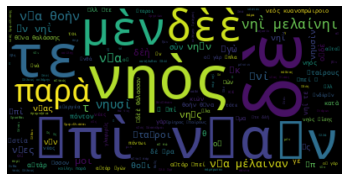

In [138]:
## preprocessed clause visualisation
X_train_clause = X_train['clause'].to_list()
words = []
for i in range(len(X_train_clause)):
    words.append(preprocess_clause(X_train_clause[i]))
stringclause = ' '.join(words)
wc = wordcloud.WordCloud().generate(stringclause)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('plots/wordcloud_filtered.jpg')